# Hypothesis Testing

## Overview Exercises

Do your work for this exercise in a jupyter notebook named `hypothesis_testing.ipynb`.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

### Is the website redesign any good?

**Null hypothesis:** 
User satisfaction scores will not imporove following webside redesign

**Alternate hypothesis:** 
User satisfaction scores will improve following website redesign

| | **H0 is true** | **H0 is false** |
| :--- | :--- | :--- |
| **Accept H0** | *D'oh!* | Company moves forward with sucky website |
| **Reject H0** | Company moves forward with newer sucky website | *Wheee!* |

### Is our television ad driving more sales?

**Null hypothesis:** 
Sales will not imporove following television ad airing

**Alternate hypothesis:** 
Sales will improve following our television ad airing

| | H0 is true | H0 is false |
| :--- | :--- | :--- |
| **Accept H0** | *D'oh!* | Opportunity for gains lost | 
| **Reject H0** | Somebody paid a lot of money for nothing | *Wheee!*|

### Has the network latency gone up since we switched internet service providers?

**Null hypothesis:** 
Network latency metrics will not imporove following switch

**Alternate hypothesis:** 
Network latency metrics will improve following switch

| | H0 is true | H0 is false |
| :--- | :--- | :--- |
| **Accept H0** | *D'oh!* | Things stay crappy and people continue to complain |
| **Reject H0** | Another somebody paid a lot of money for another nothing | *Wheee!*|

## T-Test Exercises

In [12]:
import numpy as np
import viz
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from scipy import stats
import math

In [144]:
#Functions:
def null_reject(p, alpha):
    reject = p <= alpha
    rej_ftr = '' if reject else 'FAIL TO '
    is_isnt = '' if reject else ' NOT'
    statement = f'{rej_ftr}REJCT the null hypothesis. There IS{is_isnt} a statistically significant difference'
    return reject, statement

### Ace Realty
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [145]:
#Office 1 = a, Office 2 = b, Both offices combined = pop

a_samples = 40
a_mean = 90
a_std_dev = 15
b_samples = 50
b_mean = 100
b_std_dev = 20
alpha = .05

a_std_dev_sq = a_std_dev ** 2
b_std_dev_sq = b_std_dev ** 2

a_dist = stats.norm(a_mean, a_std_dev)
b_dist = stats.norm(b_mean, b_std_dev)

# Null hypothesis: sales are same at each office

degf = a_samples + b_samples - 2

pop_std_dev = math.sqrt(((a_samples - 1) * a_std_dev_sq + (b_samples -1) * b_std_dev_sq) / degf)
pop_std_err = math.sqrt((a_std_dev_sq / a_samples) + (b_std_dev_sq / b_samples))

pop_t = abs(a_mean - b_mean) / (pop_std_dev * math.sqrt((1 / a_samples) + (1 / b_samples)))

print(f't = {pop_t:.5f}')

pop_p = stats.t(degf).sf(pop_t) * 2
print(f'p = {pop_p:.5f}')

reject, statement = null_reject(p=pop_p, alpha=alpha)
print(statement)


t = 2.62523
p = 0.01021
REJCT the null hypothesis. There IS a statistically significant difference


### mpg dataset
Load the mpg dataset and use it to answer the following questions:

In [146]:
from pydataset import data
mpg = data('mpg')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
143,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
226,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact
23,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv


In [147]:
mpg['mean_mpg'] = ((mpg.cty + mpg.hwy) / 2)
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_mpg
221,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact,20.5
143,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact,23.0
177,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv,16.0
113,hyundai,sonata,2.5,1999,6,auto(l4),f,18,26,r,midsize,22.0
106,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,30.5


- **Is there a difference in fuel-efficiency in cars from 2008 vs 1999?**

In [148]:
cars_1999 = pd.DataFrame(mpg[mpg.year == 1999])
# cars_1999.sample(5)
mpg_1999 = cars_1999.mean_mpg
n_1999 = mpg_1999.count()
mean_1999 = mpg_1999.mean()
std_dev_1999 = mpg_1999.std()
print(f'1999: {n_1999} cars, {mean_1999:.2f} average mpg, std_dev of {std_dev_1999:.3f}')

1999: 117 cars, 20.22 average mpg, std_dev of 5.208


In [149]:
cars_2008 = pd.DataFrame(mpg[mpg.year == 2008])
# cars_2008.sample(5)
mpg_2008 = cars_2008.mean_mpg
n_2008 = mpg_2008.count()
mean_2008 = mpg_2008.mean()
std_dev_2008 = mpg_2008.std()
print(f'2008: {n_2008} cars, {mean_2008:.2f} average mpg, std_dev of {std_dev_2008:.3f}')

2008: 117 cars, 20.08 average mpg, std_dev of 4.909


In [150]:
t, p = stats.ttest_ind(mpg_1999, mpg_2008)
print(f't = {t:.5f}, p = {p:.5f}')

reject, statement = null_reject(p=p, alpha=alpha)
print(statement)

t = 0.21960, p = 0.82637
FAIL TO REJCT the null hypothesis. There IS NOT a statistically significant difference


- **Are compact cars more fuel-efficient than the average car?**

In [151]:
cars_compact = pd.DataFrame(mpg[mpg['class'] == 'compact'])
cars_compact.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_mpg
13,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact,21.0
191,toyota,camry solara,3.0,1999,6,auto(l4),f,18,26,r,compact,22.0
12,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,20.0
143,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact,23.0
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5


In [152]:
mpg_compact = cars_compact.mean_mpg
n_compact = mpg_compact.count()
mean_compact = mpg_compact.mean()
std_dev_compact = mpg_compact.std()
print(f'Compacts: {n_compact} cars, {mean_compact:.2f} average mpg, std_dev of {std_dev_compact:.3f}')

Compacts: 47 cars, 24.21 average mpg, std_dev of 3.527


In [153]:
mpg_all = mpg.mean_mpg
n_all = mpg_all.count()
mean_all = mpg_all.mean()
std_dev_all = mpg_all.std()
print(f'All cars: {n_all} cars, {mean_all:.2f} average mpg, std_dev of {std_dev_all:.3f}')

All cars: 234 cars, 20.15 average mpg, std_dev of 5.050


In [154]:
t, p = stats.ttest_1samp(mpg_compact, mean_all)
print(f't = {t:.5f}, p = {p:.5f}')

reject, statement = null_reject(p=p, alpha=alpha)
print(statement)

t = 7.89689, p = 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


- **Do manual cars get better gas mileage than automatic cars?**

    $H_0$ There is no difference between the mileage of manual and automatic cars

In [155]:
cars_auto = pd.DataFrame(mpg[mpg.trans.str[:4] == 'auto'])
cars_auto.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_mpg
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv,15.0
207,toyota,toyota tacoma 4wd,4.0,2008,6,auto(l5),4,16,20,r,pickup,18.0
187,toyota,camry solara,2.2,1999,4,auto(l4),f,21,27,r,compact,24.0
193,toyota,camry solara,3.3,2008,6,auto(s5),f,18,27,r,compact,22.5
68,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,13,17,r,pickup,15.0


In [156]:
cars_manual = pd.DataFrame(mpg[mpg.trans.str[:6] == 'manual'])
cars_manual.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_mpg
217,volkswagen,jetta,2.0,2008,4,manual(m6),f,21,29,p,compact,25.0
142,nissan,altima,2.4,1999,4,manual(m5),f,21,29,r,compact,25.0
108,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact,25.0
224,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact,25.0
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5


In [157]:
mpg_auto = cars_auto.mean_mpg
n_auto = mpg_auto.count()
mean_auto = mpg_auto.mean()
std_dev_auto = mpg_auto.std()
print(f'Automatics: {n_auto} cars, {mean_auto:.2f} average mpg, std_dev of {std_dev_auto:.3f}')

Automatics: 157 cars, 19.13 average mpg, std_dev of 4.684


In [158]:
mpg_manual = cars_manual.mean_mpg
n_manual = mpg_manual.count()
mean_manual = mpg_manual.mean()
std_dev_manual = mpg_manual.std()
print(f'Mauals: {n_manual} cars, {mean_manual:.2f} average mpg, std_dev of {std_dev_manual:.3f}')

Mauals: 77 cars, 22.23 average mpg, std_dev of 5.161


In [159]:
t, p = stats.ttest_ind(mpg_auto, mpg_manual)
print(f't = {t:.5f}, p = {p:.5f}')

reject, statement = null_reject(p=p, alpha=alpha)
print(statement)

t = -4.59344, p = 0.00001
REJCT the null hypothesis. There IS a statistically significant difference


### Correlation Examples

**In-class Example:**
Is there a linear relationship between engine displacement and city mileage?

In [168]:
from pydataset import data
mpg = data('mpg')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
37,chevrolet,malibu,3.6,2008,6,auto(s6),f,17,26,r,midsize
147,nissan,altima,3.5,2008,6,auto(av),f,19,26,p,midsize
200,toyota,land cruiser wagon 4wd,5.7,2008,8,auto(s6),4,13,18,r,suv
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup
234,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


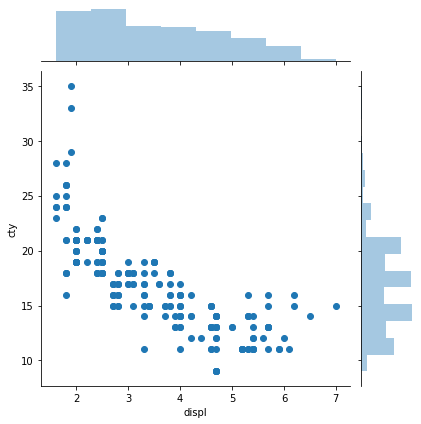

In [199]:
displ = mpg.displ
cty = mpg.cty
plots = pd.DataFrame(list(zip(displ, cty)), columns=['displ', 'cty'])
r, p = stats.pearsonr(displ, cty)
#plots.sample(5)
sns.jointplot(data=mpg, x=mpg.displ, y=mpg.cty)
plt.show()

In [176]:
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

These parameters have an r-value of -0.799 and p-value of 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


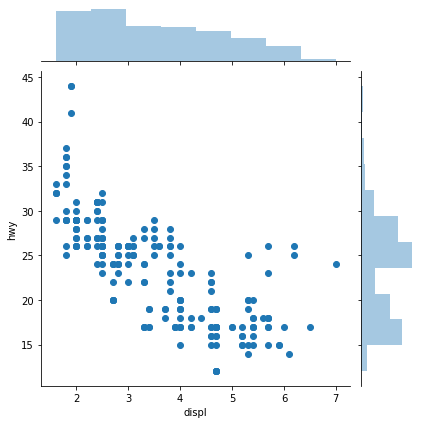

In [198]:
hwy = mpg.hwy
r, p = stats.pearsonr(displ, hwy)
sns.jointplot(data=mpg, x=mpg.displ, y=mpg.hwy)
plt.show()

In [179]:
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

These parameters have an r-value of -0.766 and p-value of 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


1. **Use the** `telco_churn` **data.**

In [201]:
from env import host, user, password
#url = f'mysql+pymysql://{user}:{password}@{host}/employees'
def get_db_url(user, password, host, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


In [253]:
telco_url = get_db_url(user, password, host, database='telco_churn')
customers = pd.read_sql('''
SELECT
    customer_id,
    gender,
    senior_citizen,
    partner,
    dependents,
    tenure,
    phone_service,
    multiple_lines,
    internet_service_type_id,
    online_security,
    online_backup,
    device_protection,
    tech_support,
    streaming_tv,
    streaming_movies,
    contract_type_id,
    paperless_billing,
    payment_type_id,
    cast(monthly_charges as decimal(11,2)) monthly_charges,
    cast((case when total_charges IS NULL then 0.00 else total_charges end) as decimal(11, 2)) total_charges,
    churn,
    (case when phone_service = 'Yes' then case when internet_service_type_id = 3 then 'phone only' else 'phone and internet' end else 'internet only' end) service_type
FROM
    customers
''', telco_url)
#customers.total_charges = customers.total_charges.apply(lambda x: 0 if len(x.str) == 0 else x)
customers.sample(5)


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,service_type
3794,5336-UFNZP,Female,1,Yes,Yes,65,Yes,Yes,2,No,...,No,Yes,Yes,2,Yes,1,107.45,7047.5,No,phone and internet
5536,7797-EJMDP,Female,0,No,No,8,Yes,No,1,Yes,...,Yes,No,Yes,1,No,3,66.05,574.5,No,phone and internet
6036,8550-XSXUQ,Male,0,Yes,No,48,Yes,Yes,1,No,...,No,No,Yes,2,Yes,4,70.55,3420.5,No,phone and internet
6855,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,2,Yes,...,Yes,Yes,Yes,3,No,4,117.50,8670.1,No,phone and internet
4942,6961-MJKBO,Male,0,No,No,47,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,No,3,20.45,943.0,No,phone only


In [282]:
print(customers.shape)
print(customers.dtypes)

(7043, 22)
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges               float64
churn                        object
service_type                 object
dtype: object


- Does tenure correlate with monthly charges?

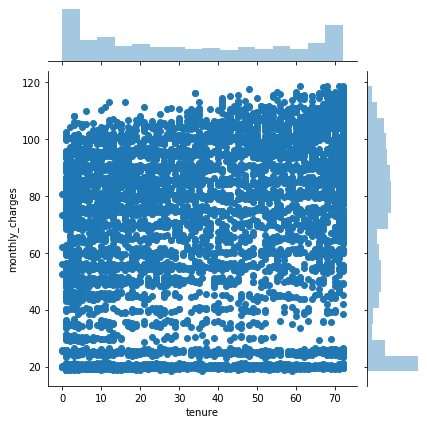

In [229]:
r, p = stats.pearsonr(customers.tenure, customers.monthly_charges)
sns.jointplot(data=customers, x=customers.tenure, y=customers.monthly_charges)
plt.show()

In [230]:
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

These parameters have an r-value of 0.248 and p-value of 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


- Total charges? 

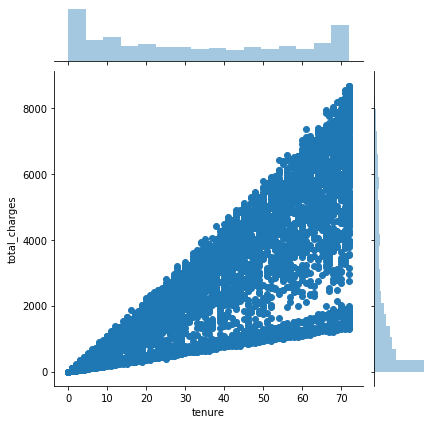

In [231]:
r, p = stats.pearsonr(customers.tenure, customers.total_charges)
sns.jointplot(data=customers, x=customers.tenure, y=customers.total_charges)
plt.show()

In [232]:
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

These parameters have an r-value of 0.826 and p-value of 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


- What happens if you control for phone and internet service

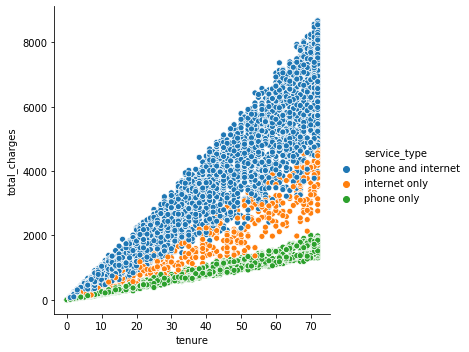

In [259]:
r, p = stats.pearsonr(customers.tenure, customers.total_charges)
sns.relplot(data=customers, x='tenure', y='total_charges', hue='service_type')
plt.show()

In [275]:
customers_po = customers[customers.service_type == 'phone only']
print(customers_po.shape)
customers_pi = customers[customers.service_type == 'phone and internet']
print(customers_pi.shape)
customers_io = customers[customers.service_type == 'internet only']
print(customers_io.shape)

(1526, 22)
(4835, 22)
(682, 22)


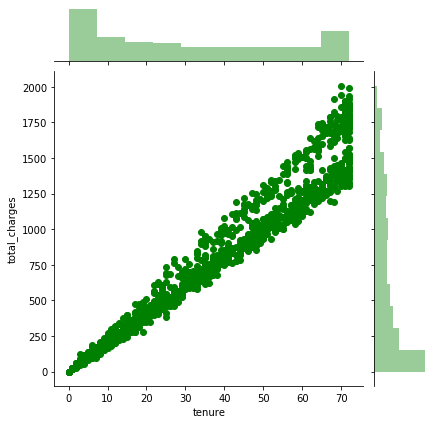

These parameters have an r-value of 0.982 and p-value of 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


In [285]:
r, p = stats.pearsonr(customers_po.tenure, customers_po.total_charges)
sns.jointplot(data=customers_po, x=customers_po.tenure, y=customers_po.total_charges, color='g')
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

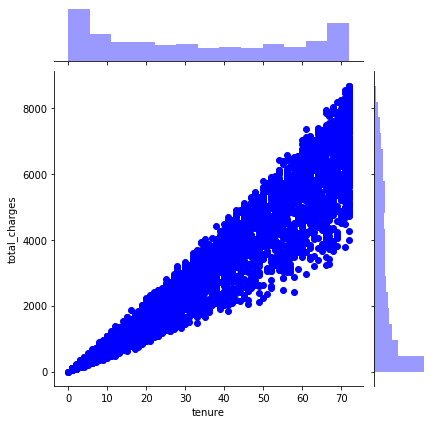

These parameters have an r-value of 0.958 and p-value of 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


In [286]:
r, p = stats.pearsonr(customers_pi.tenure, customers_pi.total_charges)
sns.jointplot(data=customers_pi, x=customers_pi.tenure, y=customers_pi.total_charges, color='blue')
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

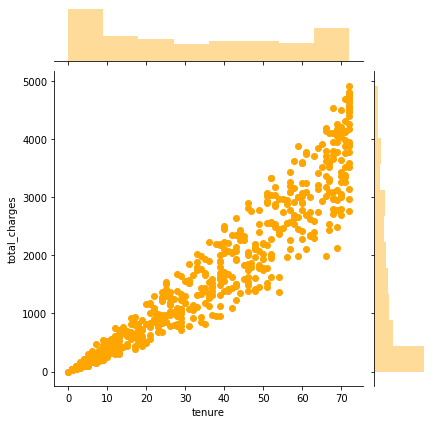

These parameters have an r-value of 0.954 and p-value of 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


In [287]:
r, p = stats.pearsonr(customers_io.tenure, customers_io.total_charges)
sns.jointplot(data=customers_io, x=customers_io.tenure, y=customers_io.total_charges, color='orange')
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

2. **Use the** `employees` **database.**

In [305]:
employees_url = get_db_url(user, password, host, database='employees')
str_to_date = '''SET @check_date =  STR_TO_DATE('2002-09-30', '%Y-%m-%d');''' 

employees = pd.read_sql('''SELECT
    e.*,
    datediff('2002-09-30', e.hire_date) tenure,
    t.title,
    t.from_date title_from,
    datediff('2002-09-30', t.from_date) t_tenure,
    et.titles,
    s.salary,
    s.from_date salary_from,
    datediff('2002-09-30', s.from_date) s_tenure,
    es.salaries
FROM
    employees e
JOIN 
    titles t 
    USING(emp_no)
JOIN 
    salaries s 
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) titles
    FROM
        titles
    GROUP BY
        emp_no) et
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) salaries
    FROM
        salaries
    GROUP BY
        emp_no) es
    USING(emp_no)
WHERE
    s.to_date > '2002-09-30'
    AND t.to_date > '2002-09-30';
''', employees_url)
print(employees.shape)
print(employees.dtypes)
employees.sample(5)

(240124, 15)
emp_no          int64
birth_date     object
first_name     object
last_name      object
gender         object
hire_date      object
tenure          int64
title          object
title_from     object
t_tenure        int64
titles          int64
salary          int64
salary_from    object
s_tenure        int64
salaries        int64
dtype: object


,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure,title,title_from,t_tenure,titles,salary,salary_from,s_tenure,salaries
116578,245423,1956-06-16,Roded,Hemaspaandra,F,1989-07-21,4819,Technique Leader,1989-07-21,4819,1,71785,2002-07-18,74,14
199090,448645,1961-06-24,Inderjeet,Valtorta,F,1990-07-12,4463,Senior Engineer,1999-01-06,1363,2,72868,2002-01-04,269,10
136830,270784,1953-10-11,Piyush,Docker,M,1987-01-07,5745,Senior Staff,1995-01-07,2823,2,91056,2002-01-03,270,16
232674,490632,1956-08-14,Marie,Orsini,F,1985-07-05,6296,Senior Engineer,1999-07-06,1182,3,77528,2002-07-01,91,18
15049,28733,1964-03-14,Arup,Spell,F,1987-12-28,5390,Senior Engineer,1993-12-27,3199,2,61934,2001-12-24,280,15


- Is there a relationship between how long an employee has been with the company and their salary?

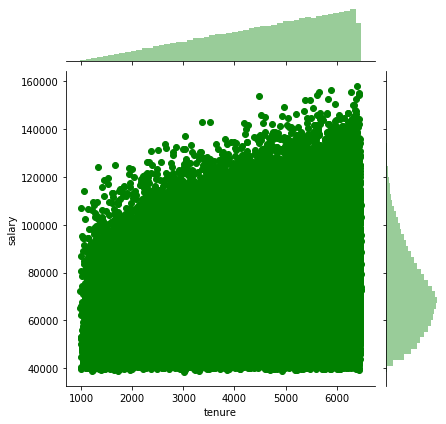

These parameters have an r-value of 0.306 and p-value of 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


In [306]:
r, p = stats.pearsonr(employees.tenure, employees.salary)
sns.jointplot(data=employees, x=employees.tenure, y=employees.salary, color='green')
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

titles
1    111892
2    125345
3      2887
Name: emp_no, dtype: int64


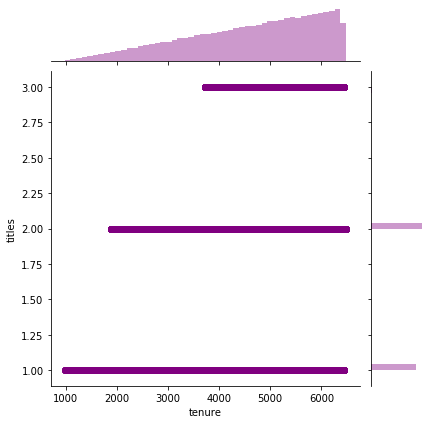

These parameters have an r-value of 0.287 and p-value of 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


In [311]:
r, p = stats.pearsonr(employees.tenure, employees.titles)
print(employees.groupby('titles').emp_no.count())
sns.jointplot(data=employees, x=employees.tenure, y=employees.titles, color='purple')
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

salaries
3      8033
4     15692
5     16086
6     15904
7     15898
8     16056
9     15968
10    16088
11    16054
12    15949
13    16067
14    16270
15    16108
16    15886
17    15909
18     8156
Name: emp_no, dtype: int64


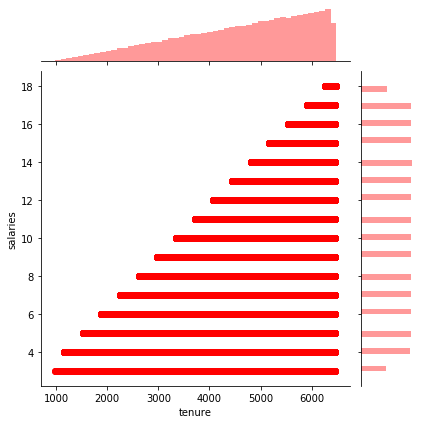

These parameters have an r-value of 0.610 and p-value of 0.00000
REJCT the null hypothesis. There IS a statistically significant difference


In [313]:
r, p = stats.pearsonr(employees.tenure, employees.salaries)
print(employees.groupby('salaries').emp_no.count())
sns.jointplot(data=employees, x=employees.tenure, y=employees.salaries, color='red')
plt.show()
print(f'These parameters have an r-value of {r:.3f} and p-value of {p:.5f}')

reject, statement = null_reject(p, alpha)
print(statement)

3 **Use the** 
`sleepstudy` 
 **data.** 

- Is there a relationship between days and reaction time?